In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures # Import PolynomialFeatures
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn.pipeline import Pipeline # Import Pipeline

np.random.seed(0)

def true_fn(X):
    return np.cos(1.5 * np.pi * X)

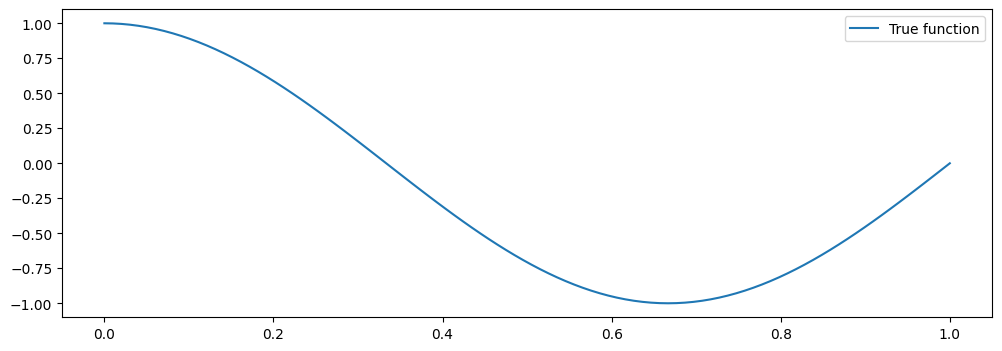

In [23]:

plt.rcParams['figure.figsize'] = [12, 4]

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fn(X_test), label="True function")
plt.legend()

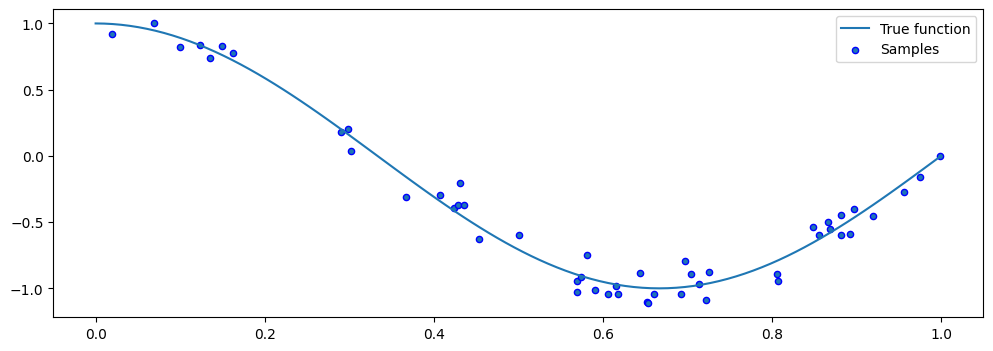

In [29]:
n_samples = 50

X = np.sort(np.random.rand(n_samples))
y = true_fn(X) + np.random.randn(n_samples) * 0.1

plt.plot(X_test, true_fn(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.legend()

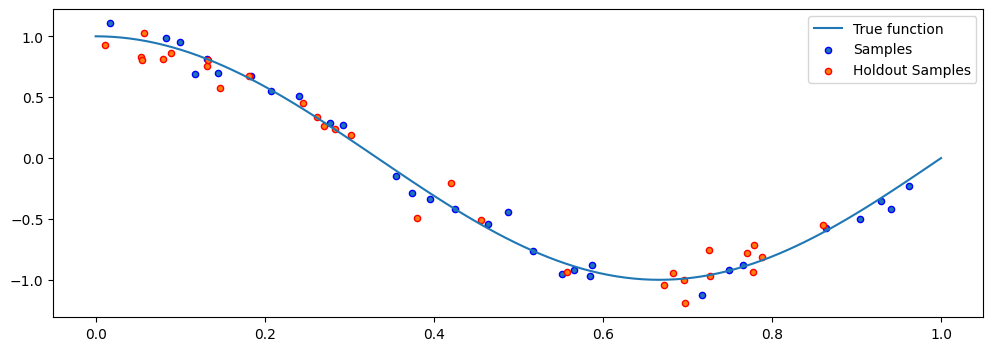

In [30]:
n_samples, n_holdout_samples = 30, 30

X = np.sort(np.random.rand(n_samples))
y = true_fn(X) + np.random.randn(n_samples) * 0.1

X_holdout = np.sort(np.random.rand(n_holdout_samples))
y_holdout = true_fn(X_holdout) + np.random.randn(n_holdout_samples) * 0.1


plt.plot(X_test, true_fn(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.scatter(X_holdout, y_holdout, edgecolor='r', s=20, label="Holdout Samples")
plt.legend()

Overfitting

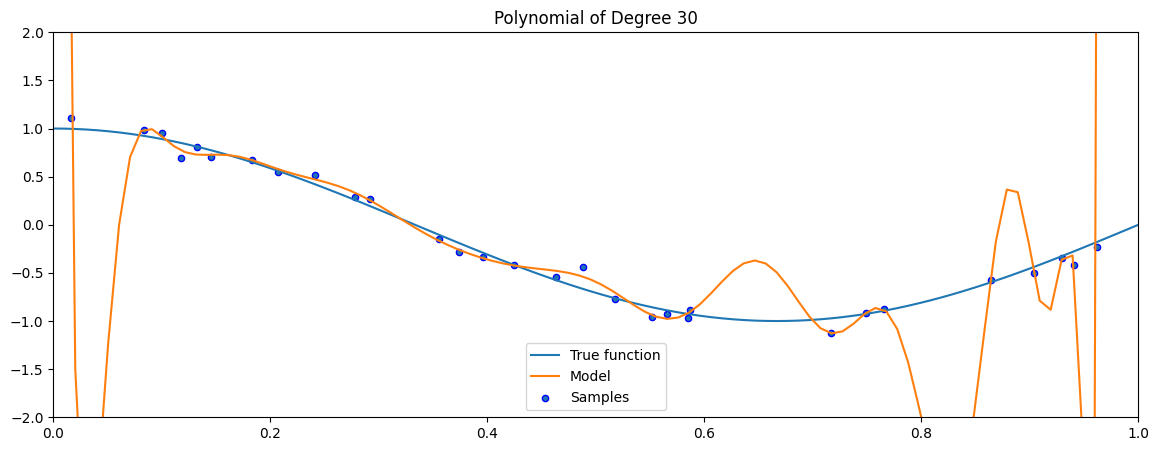

In [31]:
degrees = [30]
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    ax.plot(X_test, true_fn(X_test), label="True function")
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Polynomial of Degree {}".format(degrees[i]))